# SLU04 - Basic Stats with Pandas: Exercises notebook

In these exercises, we'll use financial data retrieved from [investing.com](https://www.investing.com/) using the Python package [investpy](https://investpy.readthedocs.io/_info/introduction.html).
Additional data was sourced from [justetf.com](https://www.justetf.com/en/) to complement the dataset.

## Objective

The goal of these exercises is for you to learn how to use pandas to obtain simple statistics from datasets. The following will be tested:
- Minimum, maximum, argmin, argmax
- Mean, median & mode
- Standard deviation and variance
- Skewness & Kurtosis
- Quantiles
- Outliers & how to deal with them

## Dataset information

![](media/etfs.jpg)

[ETFs (Exchange-traded funds)](https://www.investopedia.com/terms/e/etf.asp), as the name implies, are funds that trade on exchanges like a stock. Usually, these funds contain a basket of stocks from a certain country, region, or sector. They are popular among investors because they allow investing in multiple companies at the same time (e.g., Tesla, Google) with low fees.

This dataset contains a sample of 155 ETFs popular among European investors.

The fields in the dataset are the following:

- `isin`: Unique ETF identifier (International Securities Identification Number)
- `name`: Fund name
- `description`: Investment strategy description
- `inception_date`: Date the fund was initiated
- `currency`: Currency of the fund
- `fund_size`: Amount of money invested in the fund (in € millions)
- `ter`: Annual fee paid by investors as a % of the money invested (Total Expense Ratio)
- `returns_1y`: Fund return from July 2020 to July 2021
- `returns_inception`: Average annual fund return since inception
- `volatility_inception`: Annualized standard deviation of returns since inception (this is a measure of risk)

*Note: All data as of beginning of July 2021.*

*Note 2: In this notebook, "ETF" and "fund" will be used interchangeably. In this context, they mean the same.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import hashlib

In [2]:
data = pd.read_csv('data/etfs_sample.csv').set_index("isin")
data.head()

,name,description,inception_date,currency,fund_size,ter,returns_1y,returns_inception,volatility_inception
isin,,,,,,,,,
IE0008471009,iShares EURO STOXX 50 UCITS Dist,The EURO STOXX® 50 index tracks the 50 largest...,2000-04-03,EUR,4435,0.10,0.20,-0.004,0.220
IE0008470928,iShares STOXX Europe 50 UCITS,The STOXX® Europe 50 index tracks 50 European ...,2000-04-03,EUR,547,0.35,0.15,-0.009,0.194
FR0007052782,Lyxor UCITS CAC 40 (DR) D-EUR,The CAC 40® index tracks the largest and most ...,2000-12-13,EUR,3708,0.25,0.28,0.009,0.214
FR0007054358,Lyxor UCITS Stoxx 50 D-EUR,The EURO STOXX® 50 index tracks the 50 largest...,2001-02-19,EUR,3990,0.20,0.23,-0.007,0.221
DE0005933972,iShares TecDAX UCITS,The TecDAX® index tracks the 30 largest and mo...,2001-04-06,EUR,1000,0.51,0.16,0.029,0.270


----

# Exercise 1 

When investing in ETFs, one important factor to consider is the annual fee (`ter`) an investor is required to pay. Find the following:
 - How much is the minimum fee found in this dataset? What is the `isin` of its fund? What is its `name`?
 - As a comparison, how much is the maximum fee found in this dataset?
 
 
 *Note: a `ter` of 0.1 means an investor is required to pay 0.1% annually*

In [4]:
min_fee_value = data.ter.min()
min_fee_isin = data.ter.idxmin() # hint: isin is part of the index
min_fee_fund_name = data.loc[data.ter.idxmin(), 'name']

max_fee_value = data.ter.max()

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [5]:
min_fee_isin_hash = "0a5b1d8bdf44932ca9888453c9833c9dd297090ac376a9c1212d7b952a8f7f43"
min_fee_fund_name_hash = "921cf10934b28ec882b502ca03072b46e88e5731bcd0309d54c41762320b3ed4"

np.testing.assert_approx_equal(min_fee_value, 0.07, 3)
assert min_fee_isin_hash == hashlib.sha256(bytes(min_fee_isin, "utf-8")).hexdigest(), "If there are multiple "\
"isins with the lowest fee, return the isin of the first occurrence."
assert min_fee_fund_name_hash == hashlib.sha256(bytes(min_fee_fund_name, "utf-8")).hexdigest(), "If there are multiple "\
"fund names with the lowest fee, return the fund name of the first occurrence."

np.testing.assert_approx_equal(max_fee_value, 0.86, 3)

----

# Exercise 2

However, remember that `idxmax` and `idxmin` only return the index of the first of occurrence.

Find how many ETFs share the lowest fee (`ter`).

In [7]:
number_min_fee_funds = len(data.loc[data.ter == data.ter.min()])
len(data.loc[data.ter == data.ter.min()])

# YOUR CODE HERE
#raise NotImplementedError()

8

##### Asserts

In [8]:
number_min_fee_funds_hash = "af5570f5a1810b7af78caf4bc70a660f0df51e42baf91d4de5b2328de0e83dfc"

assert number_min_fee_funds_hash == hashlib.sha256(bytes(number_min_fee_funds)).hexdigest()

----

# Exercise 3

Now, let's focus our analysis on the returns these ETFs yielded since July 2020 (`returns_1y`). Note that, at this point in time, the stock market was starting to recover from the initial COVID-19 impact (which happened in February/ March 2020). What kind of returns do you expect to find?

Find the following information:
- What are the minimum and maximum returns?
- What is the most common return?
- What is the average return?
- What is the median return?
- What is the standard deviation of the returns?
- What is the variance of the returns?

*Note: in all return variables (including `returns_1y`) a value of 0.1 stands for 10%*

In [11]:
maximum = data.returns_1y.max()
minimum = data.returns_1y.min()
most_common = float(data.returns_1y.mode())  # Hint: you should return a number, not a pandas Series :)
mean = data.returns_1y.mean()
median = data.returns_1y.median()
standard_deviation = data.returns_1y.std()
variance = data.returns_1y.var()

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [12]:
np.testing.assert_approx_equal(maximum, 0.74, 2)
np.testing.assert_approx_equal(minimum, -0.16, 2)
assert isinstance(most_common, float), "most_common should be of type float"
np.testing.assert_approx_equal(most_common, 0.3, 2)
np.testing.assert_approx_equal(mean, 0.216, 2)
np.testing.assert_approx_equal(median, 0.25, 2)
np.testing.assert_approx_equal(standard_deviation, 0.160, 2)
np.testing.assert_approx_equal(variance, 0.025, 2)

----

# Exercise 4

Interesting. While most of the ETFs have been recovering nicely, some are lagging behind.

Have a look at the numbers you got again:
- Is the median smaller or larger than the mode?
- Is the mean smaller or larger than the median? 
- Given your answers to the questions above, do you expect the distribution of ratings to be skewed? If so, do you expect it to be positively or negatively skewed?

Plot a histogram for the distribution of ratings with 20 bins. Can you visually confirm if the distribution is skewed?

Compute the skewness measure. Is it positive or negative?

The skewness measure is -0.217.


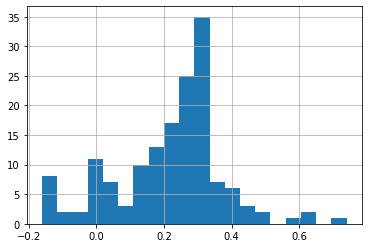

In [13]:
# plot a histogram with 20 bins
data.returns_1y.hist(bins=20);

# compute the skewness measure
skew = data.returns_1y.skew()

# YOUR CODE HERE
#raise NotImplementedError()

print("The skewness measure is {:.3f}.".format(skew))

##### Asserts

In [14]:
np.testing.assert_approx_equal(skew, -0.217, 2)

----

# Exercise 5

Let's have a look at the most popular ETF in this sample (iShares Core S&P 500 UCITS). This ETF invests in each of the 500 largest US companies. This group of companies is often called S&P500. Does it sound familiar?

We start by loading its weekly returns since 2010.

In [15]:
data_sp500 = pd.read_csv("data/returns_weekly_sp500.csv").set_index("date").squeeze() # squeeze converts from df to Series
data_sp500.head()

date
2010-06-04    0.014864
2010-06-11   -0.003008
2010-06-18    0.008395
2010-06-25   -0.040453
2010-07-02   -0.065338
Name: returns_weekly, dtype: float64

And, for comparison purposes, we are going to generate a random normal distribution with the same characteristics.

In [16]:
np.random.seed(42) # we set a random seed so all notebooks generate the same random numbers

mean, std, n = data_sp500.mean(), data_sp500.std(), data_sp500.shape[0]
random_normal_returns = np.random.normal(mean, std, n) # here, we generate the random normal distribution
data_normal = pd.Series(data=random_normal_returns, index=data_sp500.index)
data_normal.head()

date
2010-06-04    0.013831
2010-06-11   -0.000035
2010-06-18    0.017128
2010-06-25    0.036243
2010-07-02   -0.002129
dtype: float64

Remember that the stock market can be quite volatile during stress periods. 

- Based on this, which distribution do you expect to have more kurtosis (i.e., a longer "tail")?
- What do you expect the (excess) kurtosis of the random normal distribution to be?

Plot a histogram with 20 bins and compute kurtosis for each of the distributions.

The kurtosis measure for the S&P500 distribution is 5.5.
The kurtosis measure for the random normal distribution is 0.2.


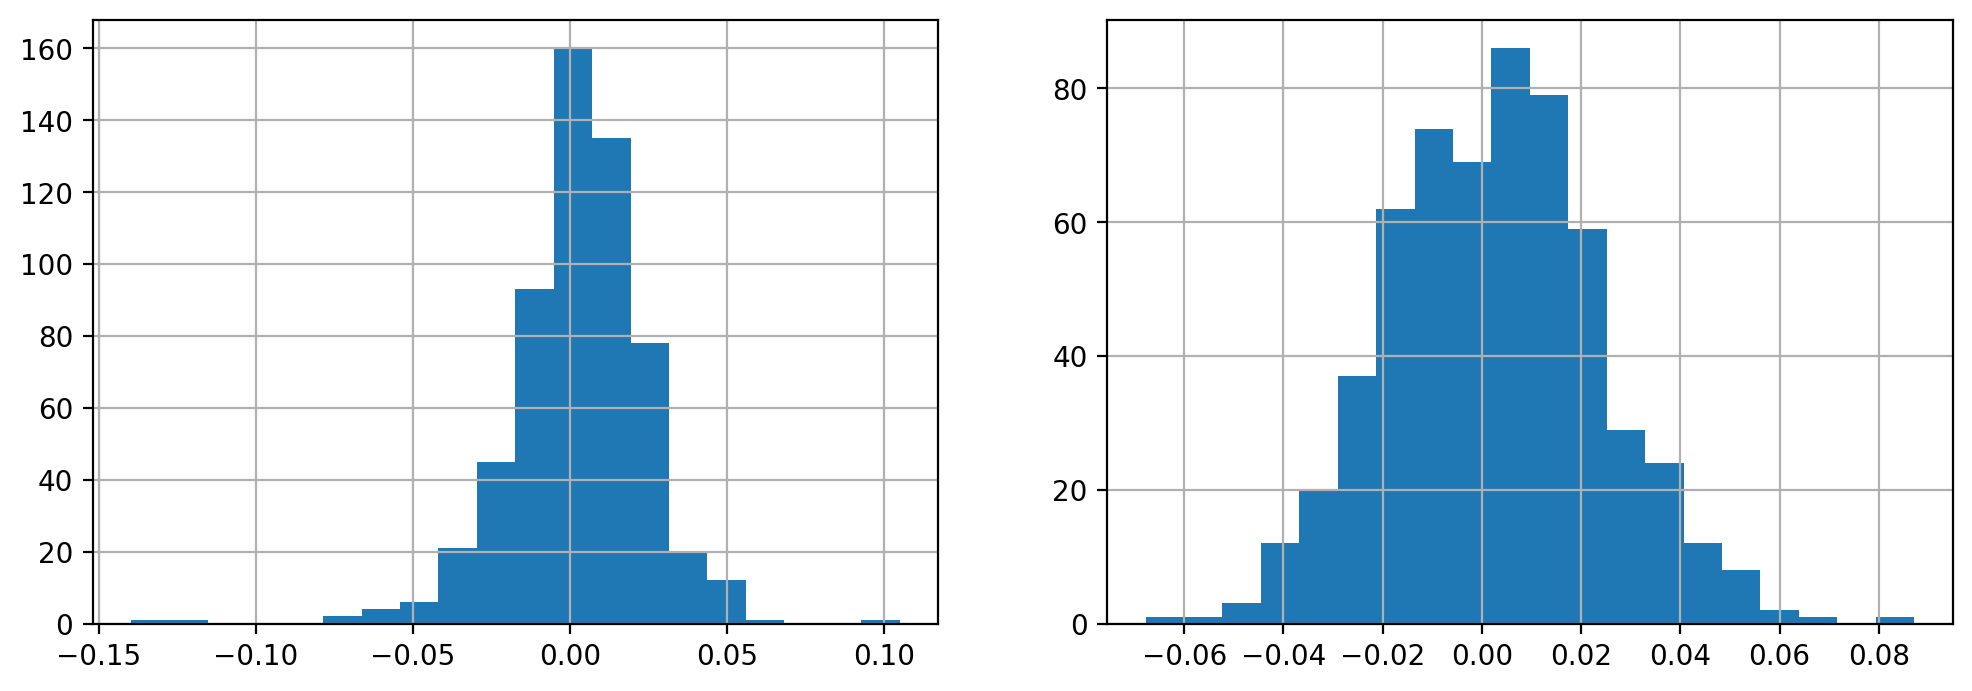

In [18]:
## plot two histograms, side-by-side
plt.figure(1, figsize=(12,4), dpi=200)
plt.subplot(121)
## plot first histogram (using the data_sp500 variable)
data_sp500.hist(bins=20)
plt.subplot(122)
## plot second histogram (using the data_normal variable)
data_normal.hist(bins=20)

## calculate kurtosis for both distributions
kurt_sp500 = data_sp500.kurt()
kurt_normal = data_normal.kurt()

# YOUR CODE HERE
#raise NotImplementedError()

print("The kurtosis measure for the S&P500 distribution is {:.1f}.".format(kurt_sp500))
print("The kurtosis measure for the random normal distribution is {:.1f}.".format(kurt_normal))

##### Asserts

In [19]:
np.testing.assert_approx_equal(kurt_sp500, 5.52, 2)
np.testing.assert_approx_equal(kurt_normal, 0.23, 2)

# Exercise 6

Find the value of the first, second, and third quartiles of the distribution of returns since July 2020 (`returns_1y`). Did you notice the value of the second quartile is equal to the median calculated in Exercise 3?


In [21]:
# output quartiles as pandas Series
quartiles = [.25, .5, .75]
returns_quartiles = data.returns_1y.quantile(quartiles)

# YOUR CODE HERE
#raise NotImplementedError()

##### Asserts

In [22]:
assert isinstance(returns_quartiles, pd.Series)
np.testing.assert_approx_equal(returns_quartiles.sum(), 0.69, 3)

----

# Exercise 7

There's a pandas method really useful to summarize variables. Do you remember what it is?

Apply the method on the `returns_inception` column and investigate the results.

In [23]:
returns_inception_summary=data.returns_inception.describe()

# YOUR CODE HERE
#raise NotImplementedError()

#### Asserts

In [24]:
assert isinstance(returns_inception_summary, pd.Series), "Make sure you apply the correct method." \
" It is used to 'describe' the variable. :)"
np.testing.assert_approx_equal(returns_inception_summary.sum(), 155.58, 2)

----

# Exercise 8

Frequently, it's useful to know how many unique values a certain variable has and to identify them.

In this exercise, obtain:

- A Series with the number of unique values in each column of the `data` DataFrame.
- A list with all the unique currencies (`currency`) present in this dataset, sorted alphabetically from A to Z.

In [31]:
unique_values_per_col = data.nunique() # the output has to be a pandas Series
unique_currencies = sorted(data.currency.unique()) # the output has to be a list
unique_currencies
# YOUR CODE HERE
#raise NotImplementedError()

['EUR', 'GBP', 'JPY', 'USD']

##### Asserts

In [32]:
unique_values_per_col_sum_hash = "ad0ba6378ab807e587dc399aa81d5dbc861511df3aa973d7ed05c6c49be32b5d"
unique_currencies_hash = "bb9e28b2078efecc96584387ca77cb3fab8cbea12ecab82bcb6868622198f363"

assert isinstance(unique_values_per_col, pd.Series), "unique_values_per_col should be a pandas Series"
assert unique_values_per_col_sum_hash == hashlib.sha256(bytes(unique_values_per_col.sum())).hexdigest()

assert isinstance(unique_currencies, list), "Make sure unique_currencies is a list. Hint: you might have to convert a numpy "\
"array or a set to a list."
assert unique_currencies_hash == hashlib.sha256(bytes("".join(unique_currencies), "utf-8")).hexdigest(), "Check that you " \
"have only unique currencies and they are sorted alphabetically (from A to Z)."

----

# Exercise 9

In this last exercise, we will focus on the amount of money invested on each of these ETFs (`fund_size` column). While most of them are relatively small with less than €2 billion invested, others can get quite massive holding €40 billion or more (I told you they can get popular!).

Consequently, when you plot this distribution in a histogram, it's very easy to detect the presence of outliers.

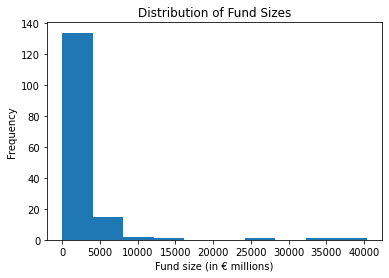

In [33]:
data["fund_size"].plot.hist()
plt.xlabel('Fund size (in € millions)')
plt.title('Distribution of Fund Sizes');

How to deal with these outliers?

In the Learning Notebook, you learned a few ways to deal with the outliers, in case they are negatively affecting your Machine Learning models. In this exercise, let's explore the **log transformation** and see if it helps us in this case.

Do the following:
- Obtain the mean and the median of the fund size values; which one is greater?
- Create a new column named `log_fund_size` with the log of fund sizes;
- Obtain the mean and the median of the log of fund sizes; are they very different from each other?
- Plot `log_fund_size` using a histogram with 30 bins. Compare the results.

What do you think? Were the outliers dealt with?

The fund size has mean 2426 and median 1124
The log of the fund size has mean 7.0 and median 7.0


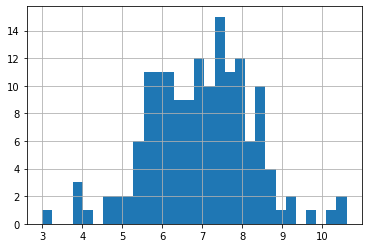

In [35]:
fund_size_mean = data.fund_size.mean()
fund_size_median = data.fund_size.median()

# create new column named log_fund_size with the log of the fund size
data['log_fund_size']=np.log(data.fund_size)

log_fund_size_mean = data.log_fund_size.mean()
log_fund_size_median = data.log_fund_size.median()

## Plot an histogram (with 30 bins) of the log of the fund size
data.log_fund_size.hist(bins=30)

# YOUR CODE HERE
#raise NotImplementedError()

print('The fund size has mean %d and median %d' % (fund_size_mean, fund_size_median))
print('The log of the fund size has mean %0.1f and median %0.1f' % (log_fund_size_mean, log_fund_size_median))

##### Asserts

In [36]:
np.testing.assert_approx_equal(fund_size_mean, 2426.5, 2)
np.testing.assert_approx_equal(fund_size_median, 1124, 1)
np.testing.assert_approx_equal(log_fund_size_mean, 7, 1)
np.testing.assert_approx_equal(log_fund_size_median, 7, 1)
np.testing.assert_approx_equal(data["log_fund_size"].sum(), 1077.6, 2)

----

The goal of this exercise notebook was to show you how we can use statistics to derive insights from "real world" data.

For that, we used financial data related to ETFs. If you want to find more about this topic, visit the following communities:
- [r/literaciafinanceira](https://www.reddit.com/r/literaciafinanceira/) (in Portuguese)
- [r/eupersonalfinance](https://www.reddit.com/r/eupersonalfinance/) (in English)

Congratulations! You have finished. Good luck with the upcoming SLUs!


![](media/complete.gif)